In [2]:
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 6)

import numpy as np

sample_rate = 48000
tau = 2.0 * np.pi

def polyblep_2sample(phase, phase_step):
    if phase < phase_step:
        t = phase / phase_step
        blep = (2 * t) - (t * t) - 1.0
        return blep
    
    if phase > (1.0 - phase_step):
        t = (phase - 1.0) / phase_step
        blep = (t * t) + (2 * t) + 1.0
        return blep
    
    return 0.0

def blep_saw(osc_freq, num_samples, sample_rate):
    out = []
    phase_step = float(osc_freq) / sample_rate
    last_phase = 0.0
    curr_phase = 0.0
    
    for i in range(0, num_samples):
        out_val = (1.0 - (2.0 * curr_phase)) + polyblep_2sample(curr_phase, phase_step)
        out.append(out_val)
        last_phase = curr_phase
        curr_phase += phase_step
        if curr_phase > 1.0:
            curr_phase -= 1.0
    return np.array(out)

Populating the interactive namespace from numpy and matplotlib


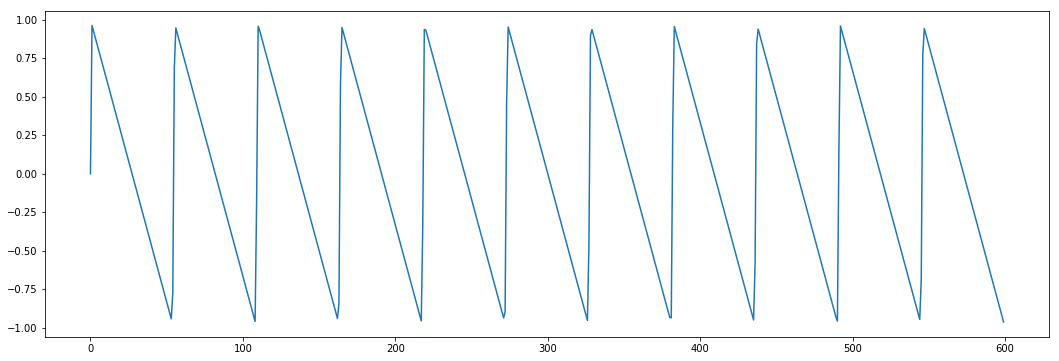

In [25]:
plot(blep_saw(880, 250, sample_rate))

In [4]:
from IPython.display import Audio

In [5]:
Audio(blep_saw(440, int(1.0 * sample_rate), sample_rate), rate=sample_rate)

In [7]:
Audio(blep_saw(1760, int(1.0 * sample_rate), sample_rate), rate=sample_rate)

In [127]:
def blep_saw_sync(osc_freq, sync_freq, num_samples, sample_rate):
    out = []
    osc_phase_step = float(osc_freq) / sample_rate
    half_phase_step = osc_phase_step / 2.0
    phase_step = osc_phase_step
    last_phase = 0.0
    curr_phase = 0.0
    
    sync_step = float(sync_freq) / sample_rate
    sync_phase = 0.0
    blep_scale = 1.0
    last_was_rephase = False
    
    for i in range(0, num_samples):
        if sync_phase > 1.0:
            sync_phase -= 1.0
            blep_scale = curr_phase
            phase_step = curr_phase + osc_phase_step + half_phase_step
            last_was_rephase = True
        elif last_was_rephase:
            last_was_rephase = False
            phase_step = osc_phase_step
            curr_phase = half_phase_step
        else:
            blep_scale = 1.0


        blep = polyblep_2sample(curr_phase, phase_step) * blep_scale
        out_val = (1.0 - (2.0 * curr_phase)) + blep
        out.append(out_val)
        last_phase = curr_phase
        curr_phase += phase_step
        if curr_phase > 1.0:
            curr_phase -= 1.0     
        sync_phase += sync_step
    return np.array(out)

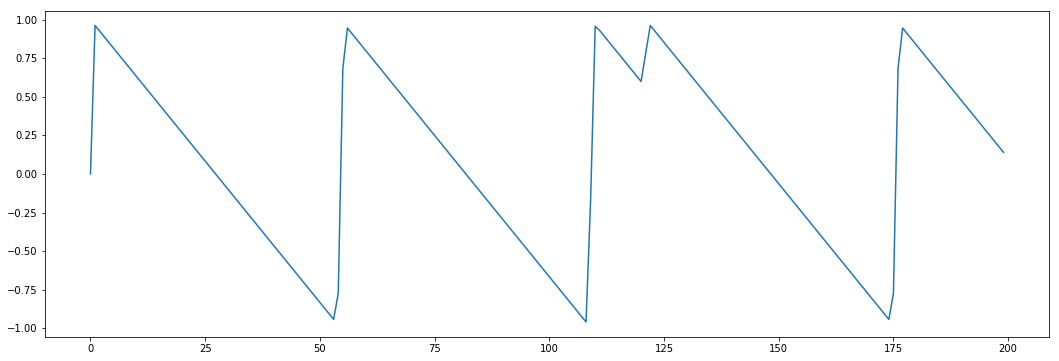

In [106]:
plot(blep_saw_sync(880, 400, 200, sample_rate))

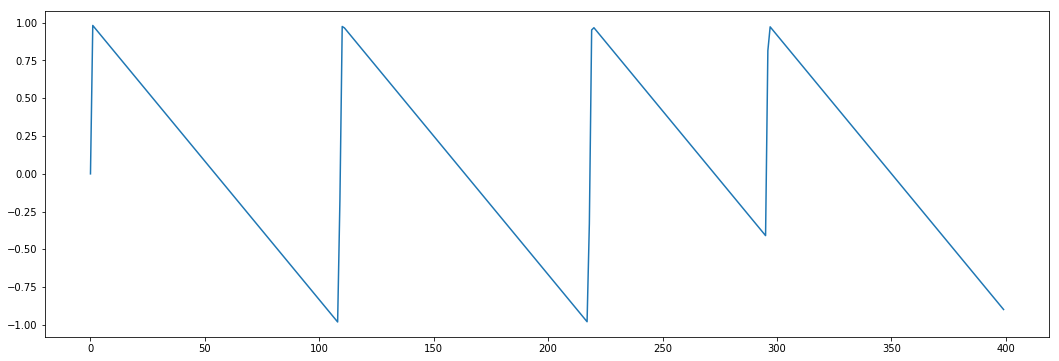

In [131]:
plot(blep_saw_sync(440, 163, 400, sample_rate))

In [56]:
Audio(blep_saw_sync(440, 241, int(4.0 * sample_rate), sample_rate), rate=sample_rate)

In [69]:
def plot_spectrum(signal, sample_rate):
    # http://samcarcagno.altervista.org/blog/basic-sound-processing-python/
    size = len(signal)
    fft_res = np.fft.fft(signal)
    fft_unique_points = int(ceil((size+1)/2.0))
    p = abs(fft_res[0:fft_unique_points])
    p = p / float(size)
    p = p ** 2
    if size % 2 == 1:
        p[1:len(p)] = p[1:len(p)] * 2
    else:
        p[1:len(p) - 1] = p[1:len(p) - 1] * 2
    freq_axis_array = arange(0, fft_unique_points, 1.0) * (sample_rate / size)
    plot(freq_axis_array/1000, 10*log10(p))
    #xscale('log')
    #xlim(xmin=20)
    xlabel('Frequency (kHz)')
    ylabel('Power (dB)')
    ylim(ymin=-100)

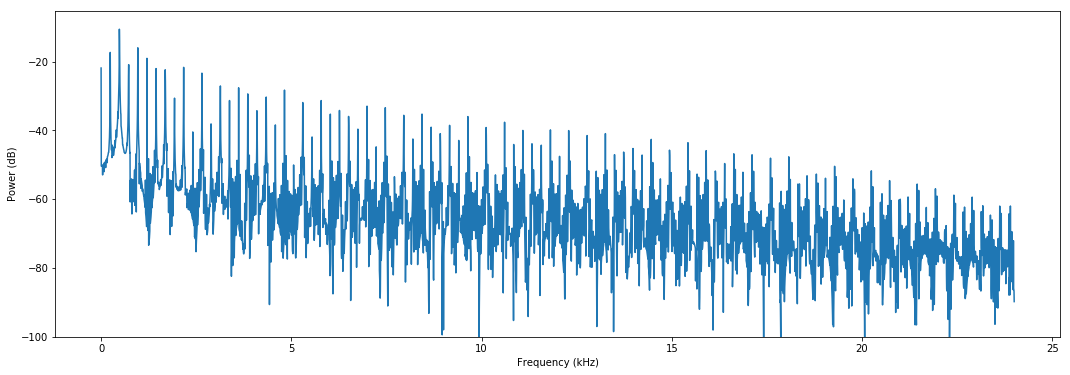

In [102]:
plot_spectrum(blep_saw_sync(440, 241, int(0.2 * sample_rate), sample_rate), sample_rate)